<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/didactica_ciencia_datos/blob/main/referentes/geron/part_1/chap_5_sv/chap_5_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Chapter 5. Support Vector Machines

# Guido Van Rossum Creador de Python
<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/6/66/Guido_van_Rossum_OSCON_2006.jpg/300px-Guido_van_Rossum_OSCON_2006.jpg'>

Una máquina de soporte vectorial (SVM) es un modelo de aprendizaje automático potente y versátil, capaz de realizar clasificación lineal o no lineal, regresión e incluso detección de valores atípicos.

Es uno de los modelos más populares en Machine Learning, y cualquier persona interesada en Machine Learning debería tenerlo en su caja de herramientas.

Las SVM son particularmente adecuadas para la clasificación de conjuntos de datos complejos de tamaño pequeño o mediano.

Este capítulo explicará los conceptos básicos de las SVM, cómo usarlas y cómo funcionan.

## Linear SVM Classification

La idea fundamental detrás de las SVM se explica mejor con algunas imágenes.

La Figura 5-1 muestra parte del conjunto de datos del iris que se presentó al final del Capítulo 4.

Las dos clases se pueden separar fácilmente con una línea recta (son linealmente separables). 

El gráfico de la izquierda muestra los límites de decisión de tres posibles clasificadores lineales.

<img src = 'https://github.com/marco-canas/didactica_ciencia_datos/blob/main/referentes/geron/part_1/chap_5_svm/figure_5_1.jpg?raw=true'>

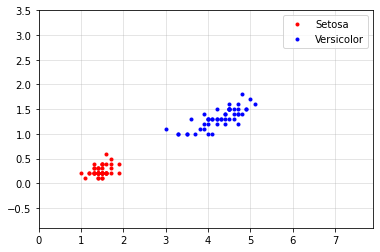

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline 

iris = load_iris()
X = iris.data[:,(2,3)] # longitud y ancho de pétalo
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,\
                                                   stratify = y)


escalador = StandardScaler()
X_train_escalado = escalador.fit_transform(X_train)
svm_clf = SVC(kernel = 'linear') 
svm_clf.fit(X_train, y_train)


#graficación de las clases
fig, ax = plt.subplots()

ax.plot(X[:,0][y==0], X[:,1][y==0],'r.', label = 'Setosa')
ax.plot(X[:,0][y==1], X[:,1][y==1], 'b.',label = 'Versicolor')

ax.legend()

ax.axis([X[:,0].min()-1, X[:,0].max()+1, X[:,1].min()-1, X[:,1].max()+1 ])
ax.grid(alpha = 0.4)

plt.show() 

In [11]:
svm_clf.intercept_, svm_clf.coef_

(array([ 3.29999995,  2.2923075 , 12.48071156]),
 array([[-1.1       , -0.7       ],
        [-0.61538458, -0.30769229],
        [-1.76922053, -2.34614702]]))

El modelo cuyo **límite de decisión** está representado por la línea discontinua es tan malo que ni siquiera separa las clases correctamente.

Los otros dos modelos funcionan perfectamente en este conjunto de entrenamiento, pero sus límites de decisión se acercan tanto a las instancias que estos modelos probablemente no funcionarán tan bien en nuevas instancias.

Por el contrario, la línea continua en el gráfico de la derecha representa el límite de decisión de un clasificador SVM; esta línea no solo separa las dos clases, sino que también se mantiene lo más alejada posible de las instancias de entrenamiento más cercanas.

Puede pensar en un clasificador SVM como si se ajustara a la calle más ancha posible (representada por las líneas discontinuas paralelas) entre las clases.

Esto se llama **clasificación de gran margen**.

Tenga en cuenta que agregar más instancias de capacitación "fuera de la calle" no afectará en absoluto el límite de decisión: está completamente determinado (o "respaldado") por las instancias ubicadas en el borde de la calle.

Estos casos se denominan vectores de soporte (están encerrados en un círculo en la figura 5-1).

<img src = 'https://github.com/marco-canas/didactica_ciencia_datos/blob/main/referentes/geron/part_1/chap_5_svm/figure_5_2.jpg?raw=true'>

## ADVERTENCIA

Las SVM son sensibles a las escalas de atributos, como puede ver en la Figura 5-2: en el gráfico de la izquierda, la escala vertical es mucho más grande que la escala horizontal, por lo que la calle más ancha posible está cerca de la horizontal. 

Después de escalar atributos (p. ej., usando `StandardScaler` de Scikit-Learn), el límite de decisión en el gráfico de la derecha se ve mucho mejor.

## Soft Margin Classification
Clasificación de margen blando

Si imponemos estrictamente que todas las instancias deben estar fuera de la calle y del lado derecho, esto se denomina *clasificación de margen duro*. 

Hay dos problemas principales con la clasificación de margen duro.

Primero, solo funciona si los datos son **linealmente separables**. 

En segundo lugar, es sensible a los **valores atípicos**.

La Figura 5-3 muestra el conjunto de datos del iris con solo un valor atípico adicional: a la izquierda, es imposible encontrar un margen duro; a la derecha, el límite de decisión termina siendo muy diferente del que vimos en la Figura 5-1 sin el valor atípico, y probablemente tampoco se generalice.

<img src = 'https://github.com/marco-canas/didactica_ciencia_datos/blob/main/referentes/geron/part_1/chap_5_svm/figure_5_3.jpg?raw=true'>

Para evitar estos problemas, utilice un modelo más flexible. 

El objetivo es encontrar un buen equilibrio entre mantener la calle lo más grande posible y limitar las violaciones de los márgenes (es decir, instancias que terminan en el medio de la calle o incluso en el lado equivocado).

Esto se llama *clasificación de margen suave*.

Al crear un modelo SVM con Scikit-Learn, podemos especificar una serie de hiperparámetros. 

C es uno de esos hiperparámetros.

Si lo establecemos en un valor bajo, terminamos con el modelo a la izquierda de la Figura 5-4.

<img src = 'https://github.com/marco-canas/didactica_ciencia_datos/blob/main/referentes/geron/part_1/chap_5_svm/figure_5_4.jpg?raw=true'>

Con un valor alto, obtenemos el modelo de la derecha.

Las violaciones de los márgenes son malas.

Por lo general, es mejor tener algunos de ellos.

Sin embargo, en este caso, el modelo de la izquierda tiene muchas violaciones de márgenes, pero probablemente generalice mejor.

### Sugerencia

Si su modelo SVM está sobreajustado, puede intentar regularizarlo reduciendo C.

El siguiente código de Scikit-Learn carga el conjunto de datos de iris, escala las características y luego entrena un modelo SVM lineal (usando la clase LinearSVC con C=1 y la función de pérdida de bisagra, descrita en breve) para detectar flores de Iris virginica:


In [15]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris virginica
svm_clf = Pipeline([
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
])
svm_clf.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

El modelo resultante se representa a la izquierda en la Figura 5-4.

Luego, como de costumbre, puede usar el modelo para hacer predicciones:

In [2]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

## NOTE

A diferencia de los clasificadores de regresión logística, los clasificadores SVM no generan probabilidades para cada clase.

En lugar de usar la clase `LinearSVC`, podríamos usar la clase SVC con un núcleo lineal.

Al crear el modelo SVC, escribiríamos `SVC(kernel="linear", C=1)`.

O podríamos usar la clase SGDClassifier, con `SGDClassifier(loss="hinge", alpha=1/(m*C))`.

In [ ]:
conda install -c conda-forge/label/broken tensorflow 

Esto aplica el Descenso de Gradiente Estocástico regular (vea el Capítulo 4) para entrenar un clasificador SVM lineal. 

No converge tan rápido como la clase LinearSVC, pero puede ser útil para manejar tareas de clasificación en línea o grandes conjuntos de datos que no caben en la memoria (entrenamiento fuera del núcleo).

### Sugerencia

La clase LinearSVC regulariza el término de sesgo, por lo que primero debe centrar el conjunto de entrenamiento restando su media.

Esto es automático si escala los datos usando StandardScaler.

También asegúrese de establecer el hiperparámetro de pérdida en "bisagra", ya que no es el valor predeterminado.

Finalmente, para un mejor rendimiento, debe establecer el hiperparámetro dual en Falso, a menos que haya más funciones que instancias de entrenamiento (hablaremos de la dualidad más adelante en este capítulo).

## Nonlinear SVM Classification

Aunque los clasificadores SVM lineales son eficientes y funcionan sorprendentemente bien en muchos casos, muchos conjuntos de datos ni siquiera están cerca de ser separables linealmente.

Un enfoque para manejar conjuntos de datos no lineales es agregar más atributos, como atributos polinomiales (como hizo en el Capítulo 4); en algunos casos, esto puede dar como resultado un conjunto de datos linealmente separable.

Considere el diagrama de la izquierda en la Figura 5-5: representa un conjunto de datos simple con solo una característica, $x_{1}$.

<img src = 'https://github.com/marco-canas/didactica_ciencia_datos/blob/main/referentes/geron/part_1/chap_5_svm/figure_5_5.jpg?raw=true'>

Este conjunto de datos no es linealmente separable, como puede ver.

Pero si agrega una segunda característica $x_{2} = (x_{1})^{2}$ , el conjunto de datos 2D resultante es perfectamente separable linealmente.

Para implementar esta idea usando Scikit-Learn, cree un Pipeline que contenga un transformador `PolynomialFeatures` (discutido en "Regresión polinomial"), seguido de un `StandardScaler` y un `LinearSVC`. 

Probemos esto en el conjunto de datos de las lunas: este es un conjunto de datos de juguete para la clasificación binaria en el que los puntos de datos tienen la forma de dos semicírculos intercalados (consulte la Figura 5-6).

<img src = 'https://github.com/marco-canas/didactica_ciencia_datos/blob/main/referentes/geron/part_1/chap_5_svm/figure_5_6.jpg?raw=true'>

Puedes generar este conjunto de datos usando la función `make_moons()`:

In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
                              ("poly_features", PolynomialFeatures(degree=3)),
                              ("scaler", StandardScaler()),
                              ("svm_clf", LinearSVC(C=10, loss="hinge"))
                              ])
polynomial_svm_clf.fit(X, y)


## Polynomial Kernel

Agregar funciones polinómicas es simple de implementar y puede funcionar muy bien con todo tipo de algoritmos de aprendizaje automático (no solo SVM).

Dicho esto, en un grado polinomial bajo, este método no puede manejar conjuntos de datos muy complejos, y con un grado polinomial alto crea una gran cantidad de características, lo que hace que el modelo sea demasiado lento.

Afortunadamente, al usar SVM, puede aplicar una técnica matemática casi milagrosa llamada truco del kernel (explicado en un momento).

El truco del núcleo hace posible obtener el mismo resultado que si hubiera agregado muchas características polinómicas, incluso con polinomios de muy alto grado, sin tener que agregarlas.

Por lo tanto, no hay una explosión combinatoria de la cantidad de funciones porque en realidad no agrega ninguna característica.

Este truco lo implementa la clase SVC.

Vamos a probarlo en el conjunto de datos de las lunas:

In [3]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

Este código entrena un clasificador SVM utilizando un kernel polinomial de tercer grado.

Se representa a la izquierda en la Figura 5-7. 

A la derecha hay otro clasificador SVM que utiliza un núcleo polinomial de décimo grado.

<img src = 'https://github.com/marco-canas/didactica_ciencia_datos/blob/main/referentes/geron/part_1/chap_5_svm/figure_5_7.jpg?raw=true'>

Obviamente, si su modelo se ajusta en exceso, es posible que desee reducir el grado del polinomio.

Por el contrario, si no se ajusta bien, puede intentar aumentarlo.

El hiperparámetro `coef0` controla cuánto influyen en el modelo los polinomios de alto grado frente a los polinomios de bajo grado.

## Sugerencia

Un enfoque común para encontrar los valores correctos de hiperparámetros es usar la búsqueda en cuadrícula (consulte el Capítulo 2).

A menudo es más rápido hacer primero una búsqueda de cuadrícula muy gruesa y luego una búsqueda de cuadrícula más fina alrededor de los mejores valores encontrados.

Tener una buena idea de lo que realmente hace cada hiperparámetro también puede ayudarlo a buscar en la parte correcta del espacio de hiperparámetros.

## Similarity Features

Otra técnica para abordar problemas no lineales es agregar características calculadas usando una función de similitud, que mide cuánto se parece cada instancia a un punto de referencia particular.

Por ejemplo, tomemos el conjunto de datos 1D discutido anteriormente y agreguemos dos puntos de referencia en $x = –2$ y $x = 1$ (vea el diagrama de la izquierda en la Figura 5-8).

A continuación, definamos que la función de similitud es la función de base radial gaussiana (RBF) con $\gamma = 0,3$ (consulte la ecuación 5-1).

Equation 5-1. Gaussian RBF

$$ \phi_{\gamma}(x,\mathcal{l}) = exp\left( -\gamma \Vert x - \mathcal{l} \Vert^{2} \right) $$


Esta es una función en forma de campana que varía de 0 (muy lejos del punto de referencia) a 1 (en el punto de referencia).

Now we are ready to compute the new features. 

For example, let’s look at the instance $x = –1$: it is located at a distance of 1 from the first landmark and 2 from the second landmark. 

Therefore its new features are $x = exp(–0.3 × 1 ) \approx 0.74$ and $x = exp(– 0.3 × 2 ) \approx 0.30$. 

The plot on the right in Figure 5-8 shows the transformed dataset (dropping the original features). 

<img src = 'https://github.com/marco-canas/didactica_ciencia_datos/blob/main/referentes/geron/part_1/chap_5_svm/figure_5_8.jpg?raw=true'>

Como puede ver, ahora es linealmente separable.

You may wonder how to select the landmarks. 

The simplest approach is to create a landmark at the location of each and every instance in the dataset. 

Doing that creates many dimensions and thus increases the chances that the transformed training set will be linearly separable. 

The downside is that a training set with m instances and n features gets transformed into a training set with m instances and m features (assuming you drop the original features). 

If your training set is very large, you end up with an equally large number of features.

## Gaussian RBF Kernel

Al igual que el método de características polinómicas, el método de características de similitud puede ser útil con cualquier algoritmo de aprendizaje automático, pero puede ser computacionalmente costoso calcular todas las características adicionales, especialmente en grandes conjuntos de entrenamiento.

Once again the kernel trick does its SVM magic, making it possible to obtain a similar result as if you had added many similarity features. 

Let’s try the SVC class with the Gaussian RBF kernel:

In [4]:
rbf_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

This model is represented at the bottom left in Figure 5-9. 

Los otros gráficos muestran modelos entrenados con diferentes valores de hiperparámetros gamma ($\gamma$) y `C`.

Increasing gamma makes the bell-shaped curve narrower (see the righthand plots in Figure 5-8). 

As a result, each instance’s range of influence is smaller: the decision boundary ends up being more
irregular, wiggling around individual instances. 

Conversely, a small gamma value makes the bell-shaped curve wider: instances have a larger range of influence, and the decision boundary ends up smoother. 

So γ acts like a regularization hyperparameter: if your model is overfitting, you should reduce it; if it is underfitting, you should increase it (similar to the C hyperparameter).

Other kernels exist but are used much more rarely. 

Some kernels are specialized for specific data structures. 

String kernels are sometimes used when classifying text documents or DNA sequences (e.g., using the string subsequence kernel or kernels based on the Levenshtein distance).

<img src = 'https://github.com/marco-canas/didactica_ciencia_datos/blob/main/referentes/geron/part_1/chap_5_svm/figura_5_9.jpg?raw=true'>

## TIP

Con tantos núcleos para elegir, ¿cómo puede decidir cuál usar?

Como regla general, siempre debe probar primero el kernel lineal (recuerde que LinearSVC es mucho más rápido que SVC(kernel="linear")), especialmente si el conjunto de entrenamiento es muy grande o si tiene muchas funciones.

Si el conjunto de entrenamiento no es demasiado grande, también debería probar el kernel Gaussian RBF; funciona bien en la mayoría de los casos. 

Luego, si tiene tiempo libre y poder de cómputo, puede experimentar con algunos otros núcleos, utilizando la validación cruzada y la búsqueda en cuadrícula.

Le gustaría experimentar así, especialmente si hay núcleos especializados para la estructura de datos de su conjunto de entrenamiento.

## Complejidad computacional

La clase LinearSVC se basa en la biblioteca liblinear, que implementa un algoritmo optimizado para SVM lineales. 

No es compatible con el truco del kernel, pero escala casi linealmente con la cantidad de instancias de capacitación y la cantidad de funciones.

Its training time complexity is roughly $O(m \times n)$.

The algorithm takes longer if you require very high precision. 

This is controlled by the tolerance hyperparameter $\epsilon$ (called tol in Scikit-Learn). 

En la mayoría de las tareas de clasificación, la tolerancia predeterminada está bien.

The SVC class is based on the libsvm library, which implements an algorithm that supports
the kernel trick. 

The training time complexity is usually between $O(m × n)$ and $O(m × n)$. 

Unfortunately, this means that it gets dreadfully slow when the number of training instances gets large (e.g., hundreds of thousands of instances). 

This algorithm is perfect for complex small or medium-sized training sets. 

It scales well with the number of features, especially with sparse features (i.e., when each instance has few nonzero features). 

In this case, the algorithm scales roughly with the average number of nonzero features per
instance. 

Table 5-1 compares Scikit-Learn’s SVM classification classes.

<img src = 'https://github.com/marco-canas/didactica_ciencia_datos/blob/main/referentes/geron/part_1/chap_5_svm/table_5_1.jpg?raw=true'>

## SVM Regression

As mentioned earlier, the SVM algorithm is versatile: not only does it support linear and nonlinear classification, but it also supports linear and nonlinear regression. 

Para usar SVM para la regresión en lugar de la clasificación, el truco es invertir el objetivo: en lugar de intentar encajar la calle más grande posible entre dos clases mientras limita las violaciones de margen, SVM Regression intenta encajar tantas instancias como sea posible en la calle mientras limita el margen. infracciones (es decir, instancias fuera de la calle).

The width of the street is controlled by a hyperparameter, $\epsilon$. 

Figure 5-10 shows two linear SVM Regression models trained on some random linear data, one with a large margin ($ϵ = 1.5$) and the other with a small margin ($ϵ = 0.5$).

<img src = 'https://github.com/marco-canas/didactica_ciencia_datos/blob/main/referentes/geron/part_1/chap_5_svm/figure_5_10.jpg?raw=true'>

Agregar más instancias de entrenamiento dentro del margen no afecta las predicciones del modelo; por lo tanto, se dice que el modelo es $\epsilon$-insensible.

Puede utilizar la clase `LinearSVR` de Scikit-Learn para realizar una regresión SVM lineal.

The following code produces the model represented on the left in Figure 5-10 (the training data
should be scaled and centered first):

In [ ]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

To tackle nonlinear regression tasks, you can use a kernelized SVM model. 

Figure 5-11 shows SVM Regression on a random quadratic training set, using a second-degree
polynomial kernel. 

There is little regularization in the left plot (i.e., a large C value), and much more regularization in the right plot (i.e., a small C value).

figura 5.11
<img src = ''>

The following code uses Scikit-Learn’s SVR class (which supports the kernel trick) to
produce the model represented on the left in Figure 5-11:

In [ ]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

The SVR class is the regression equivalent of the SVC class, and the LinearSVR class is the
regression equivalent of the LinearSVC class. 

The LinearSVR class scales linearly with the size of the training set (just like the LinearSVC class), while the SVR class gets much too slow when the training set grows large (just like the SVC class).

## NOTE  

SVMs can also be used for outlier detection; see Scikit-Learn’s documentation for more details.

# Under the Hood

This section explains how SVMs make predictions and how their training algorithms work, starting with linear SVM classifiers. 

If you are just getting started with Machine Learning, you can safely skip it and go straight to the exercises at the end of this chapter, and come back later when you want to get a deeper understanding of SVMs.

First, a word about notations. In Chapter 4 we used the convention of putting all the model
parameters in one vector θ, including the bias term θ and the input feature weights θ to θ , and adding a bias input x = 1 to all instances. 

In this chapter we will use a convention that is more convenient (and more common) when dealing with SVMs: the bias term will be called b, and the feature weights vector will be called w. No bias feature will be added to the input feature vectors.

## Decision Function and Predictions

The linear SVM classifier model predicts the class of a new instance x by simply computing the decision function $w x + b = w x + … + w x + b$. 

If the result is positive, the predicted class ŷ is the positive class (1), and otherwise it is the negative class (0); see Equation 5-2.

# Implementación en código de la propuesta de Gerón para la aplicación de las Máquinas de soporte vectorial para clasificación binaria

## [Chapter 5 – Support Vector Machines](https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb)

Este cuaderno contiene todo el código de muestra y las soluciones a los ejercicios del capítulo 5.

## Setup

Primero, importemos algunos módulos comunes, asegurémonos de que MatplotLib trace figuras en línea y prepare una función para guardar las figuras.

También verificamos que Python 3.5 o posterior esté instalado (aunque Python 2.x puede funcionar, está obsoleto, por lo que le recomendamos que use Python 3 en su lugar), así como Scikit-Learn $\geq $ 0.20.

In [4]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Linear SVM Classification

The next few code cells generate the first figures in chapter 5. 

The first actual code sample comes after.

Code to generate Figure 5–1. Large margin classification

In [5]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

Saving figure large_margin_classification_plot


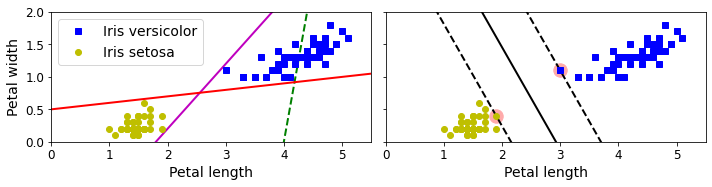

In [6]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")
plt.show()

Code to generate Figure 5–2. Sensitivity to feature scales

Saving figure sensitivity_to_feature_scales_plot


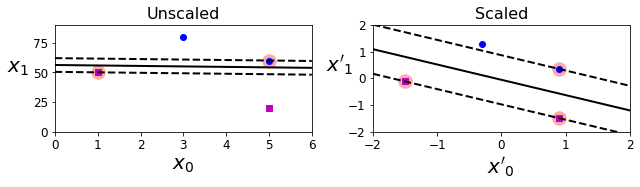

In [7]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

save_fig("sensitivity_to_feature_scales_plot")

## Referencias  

* El modelo de Máquina de soporte vectorial: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html  

* Cuaderno de Geron sobre Maquinas de Soporte Vectorial: https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb
